In [12]:
# !pip install influxdb-client

In [13]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path
import numpy as np

In [14]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'Temporary', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [15]:
query_standard_anomaly = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-09-26T12:30:00Z, stop: 2023-09-26T13:00:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Anomaly_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 1051)'
result_standard_anomaly = query_api.query_data_frame(org=org, query=query_standard_anomaly)

# display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard_anomaly = result_standard_anomaly[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_standard_anomaly)

      timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0          30.0       0.0        0.041667            1.0  200.010851  \
1          30.0       1.0        0.041667            1.0  200.010851   
2          30.0       2.0        0.041667            1.0  200.010851   
3          30.0       3.0        0.041667            1.0  200.010851   
4          30.0       4.0        0.000000            0.0  200.000000   
...         ...       ...             ...            ...         ...   
1066      630.0      46.0        0.125000            3.0  200.292969   
1067      630.0      47.0        0.083333            2.0  200.086806   
1068      630.0      48.0        0.083333            2.0  200.086806   
1069      630.0      49.0        0.083333            2.0  200.086806   
1070      630.0      50.0        0.083333            2.0  200.086806   

        powerTotal  
0     6.000305e+03  
1     1.200054e+04  
2     1.800071e+04  
3     2.613069e+04  
4     3.213078e+04  
...      

In [16]:
query_standard_non_anomaly = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-09-26T12:30:00Z, stop: 2023-09-26T13:00:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Anomaly_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 1050)'
result_standard_non_anomaly = query_api.query_data_frame(org=org, query=query_standard_non_anomaly)

# display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard_non_anomaly = result_standard_non_anomaly[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_standard_non_anomaly)

      timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0          30.0       0.0        0.041667            1.0  200.010851  \
1          30.0       1.0        0.041667            1.0  200.010851   
2          30.0       2.0        0.041667            1.0  200.010851   
3          30.0       3.0        0.041667            1.0  200.010851   
4          30.0       4.0        0.000000            0.0  200.000000   
...         ...       ...             ...            ...         ...   
1021      630.0       1.0        0.083333            2.0  200.086806   
1022      630.0       2.0        0.166667            4.0  200.694444   
1023      630.0       3.0        0.166667            4.0  200.694444   
1024      630.0       4.0        0.125000            3.0  200.292969   
1025      630.0       5.0        0.166667            4.0  200.694444   

        powerTotal  
0     6.000305e+03  
1     1.200054e+04  
2     1.800071e+04  
3     2.400081e+04  
4     3.000090e+04  
...      

In [17]:
df_power_standard_non_anomaly = df_standard_non_anomaly[['timestamp','serverId','guestsRunning','powerUsage']]
df_power_standard_non_anomaly['serverId'] = df_standard_non_anomaly['serverId'].astype(int)
df_power_standard_non_anomaly['guestsRunning'] = df_standard_non_anomaly['guestsRunning'].astype(int)
# df_power_standard_non_anomaly = df_power_standard_non_anomaly.loc[df_standard_non_anomaly['serverId'] == 9]
print(df_power_standard_non_anomaly)

      timestamp  serverId  guestsRunning  powerUsage
0          30.0         0              1  200.010851
1          30.0         1              1  200.010851
2          30.0         2              1  200.010851
3          30.0         3              1  200.010851
4          30.0         4              0  200.000000
...         ...       ...            ...         ...
1021      630.0         1              2  200.086806
1022      630.0         2              4  200.694444
1023      630.0         3              4  200.694444
1024      630.0         4              3  200.292969
1025      630.0         5              4  200.694444

[1026 rows x 4 columns]


/tmp/ipykernel_27682/2310575635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_standard_non_anomaly['serverId'] = df_standard_non_anomaly['serverId'].astype(int)
/tmp/ipykernel_27682/2310575635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_standard_non_anomaly['guestsRunning'] = df_standard_non_anomaly['guestsRunning'].astype(int)


In [18]:
df_power_standard_anomaly = df_standard_anomaly[['timestamp','serverId','guestsRunning','powerUsage']]
df_power_standard_anomaly['serverId'] = df_standard_anomaly['serverId'].astype(int)
df_power_standard_anomaly['guestsRunning'] = df_standard_anomaly['guestsRunning'].astype(int)
# df_power_standard_anomaly = df_power_standard_anomaly.loc[df_standard_anomaly['serverId'] == 9]
print(df_power_standard_anomaly)

      timestamp  serverId  guestsRunning  powerUsage
0          30.0         0              1  200.010851
1          30.0         1              1  200.010851
2          30.0         2              1  200.010851
3          30.0         3              1  200.010851
4          30.0         4              0  200.000000
...         ...       ...            ...         ...
1066      630.0        46              3  200.292969
1067      630.0        47              2  200.086806
1068      630.0        48              2  200.086806
1069      630.0        49              2  200.086806
1070      630.0        50              2  200.086806

[1071 rows x 4 columns]


/tmp/ipykernel_27682/847114100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_standard_anomaly['serverId'] = df_standard_anomaly['serverId'].astype(int)
/tmp/ipykernel_27682/847114100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_standard_anomaly['guestsRunning'] = df_standard_anomaly['guestsRunning'].astype(int)


<Figure size 1600x1000 with 0 Axes>

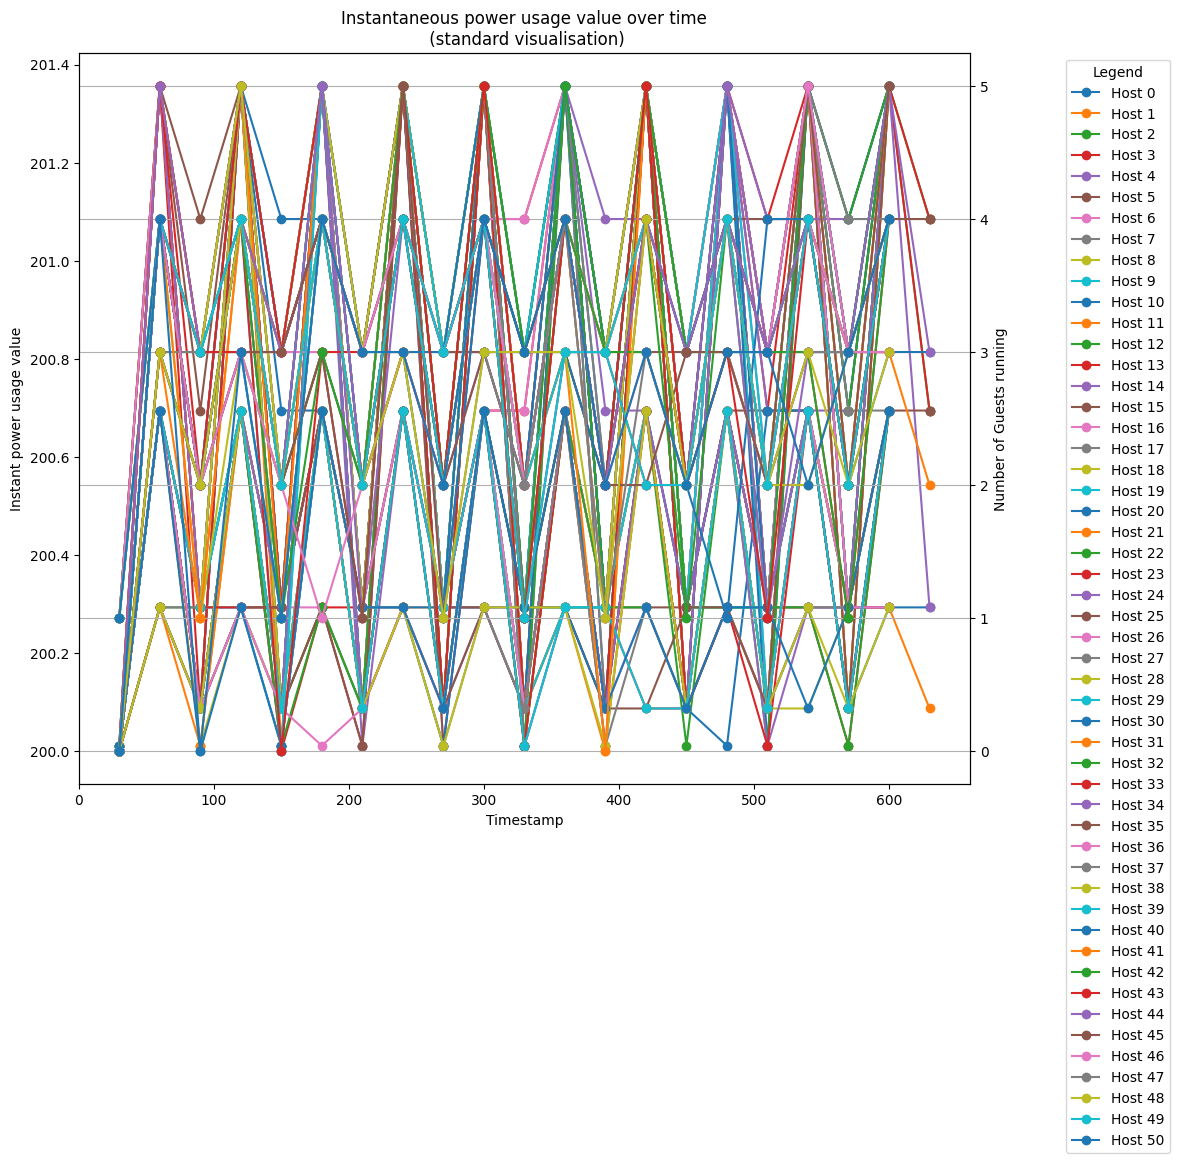

In [19]:
# Create a list of unique hosts
all_hosts = df_power_standard_non_anomaly['serverId'].unique()

# Increase the plot size
plt.figure(figsize=(16, 10))

# Create the main plot with the left y-axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot all hosts from non-anomalous dataset
for host_id in all_hosts:
    host_data = df_power_standard_non_anomaly[df_power_standard_non_anomaly['serverId'] == host_id]
    ax1.plot(host_data['timestamp'], host_data['powerUsage'], marker='o', label=f'Host {host_id}')
    ax1.set_ylabel('Instant power usage value') #  color='b'
    ax2.plot(host_data['timestamp'], host_data['guestsRunning'], marker='o', label=f'Host {host_id}')
    ax2.set_ylabel('Number of Guests running')
    
# Combine the legend for both plots
lines1, labels = ax1.get_legend_handles_labels()
lines2, labels = ax2.get_legend_handles_labels()
lines = lines1 + lines2
ax1.legend(lines, labels, loc='upper left')

# Adjust the legend placement outside of the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.10, 1), title='Legend')

ax1.set_xlabel('Timestamp')
plt.title('Instantaneous power usage value over time\n (standard visualisation)')
# plt.legend()
plt.grid(True)
fig.set_size_inches(11.5, 9.5)
plt.show()

<Figure size 1600x1000 with 0 Axes>

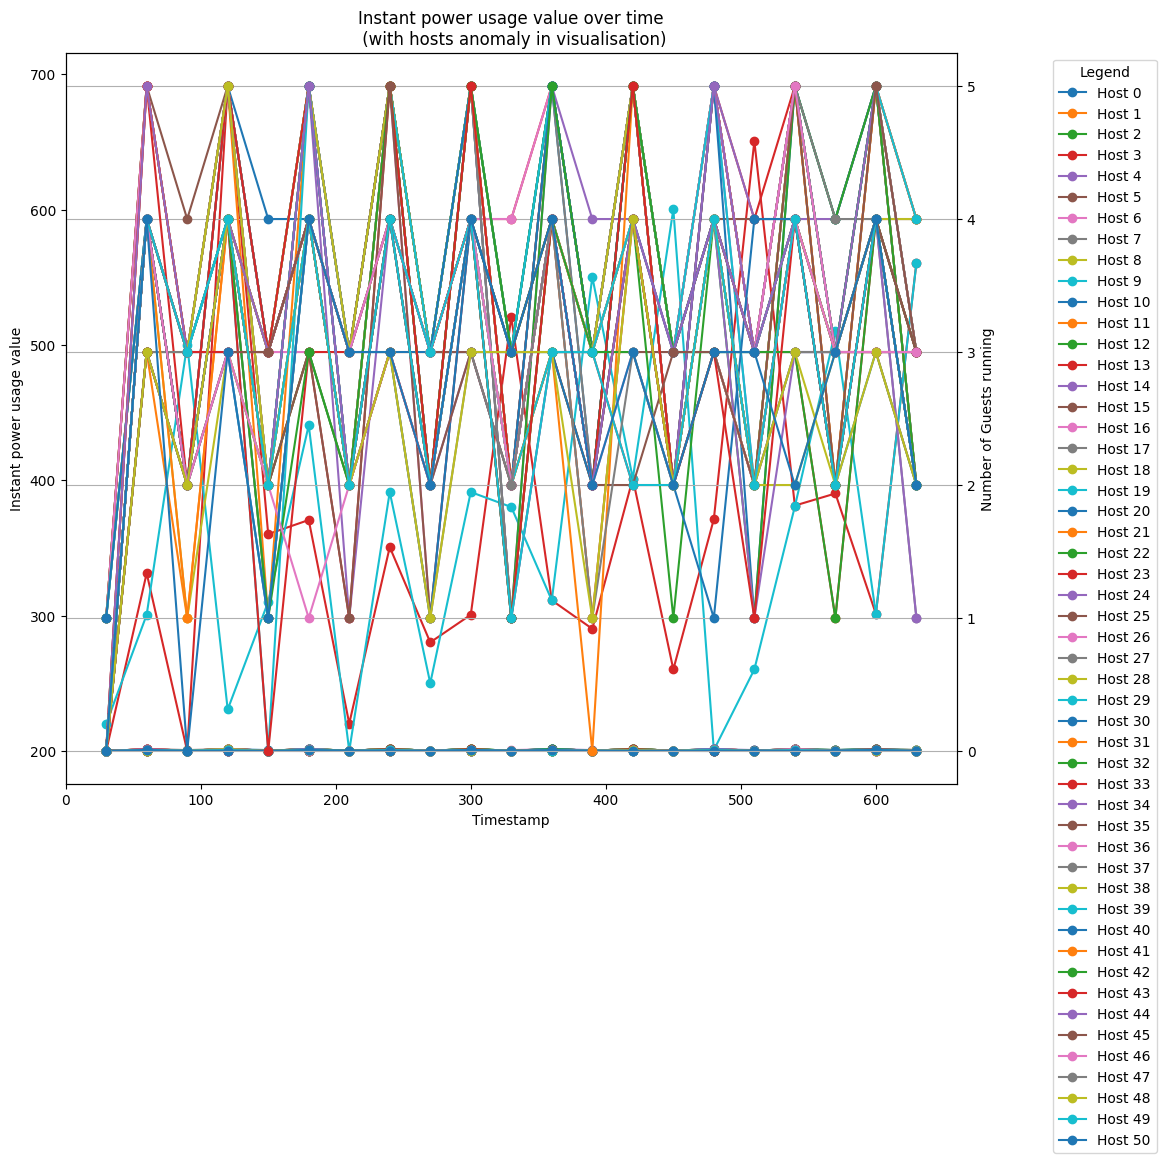

In [20]:
# Create a list of unique hosts
all_hosts = df_power_standard_anomaly['serverId'].unique()

# Increase the plot size
plt.figure(figsize=(16, 10))

# Create the main plot with the left y-axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot all hosts from non-anomalous dataset
for host_id in all_hosts:
    host_data = df_power_standard_anomaly[df_power_standard_anomaly['serverId'] == host_id]
    ax1.plot(host_data['timestamp'], host_data['powerUsage'], marker='o', label=f'Host {host_id}')
    ax1.set_ylabel('Instant power usage value') #  color='b'
    ax2.plot(host_data['timestamp'], host_data['guestsRunning'], marker='o', label=f'Host {host_id}')
    ax2.set_ylabel('Number of Guests running')
    
# Combine the legend for both plots
lines, labels = ax1.get_legend_handles_labels()
lines, labels = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
ax1.legend(lines, labels, loc='upper left')

# Adjust the legend placement outside of the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.10, 1), title='Legend')

ax1.set_xlabel('Timestamp')
#ax1.set_ylabel('Instantaneous power usage value')
plt.title('Instant power usage value over time\n (with hosts anomaly in visualisation)')
# plt.legend()
plt.grid(True)
fig.set_size_inches(11.5, 9.5)
plt.show()

In [21]:
# Merge the two data frames on time, server_id, and guests
merged_df = df_power_standard_non_anomaly.merge(df_power_standard_anomaly, on=['timestamp', 'serverId', 'guestsRunning'], suffixes=('_non_anomaly', '_anomaly'))

# Calculate the absolute difference between power values
merged_df['power_diff'] = abs(merged_df['powerUsage_non_anomaly'] - merged_df['powerUsage_anomaly'])

# Set a threshold for anomaly detection (adjust as needed)
threshold = 10  # Example threshold

# Flag servers as anomalous based on the threshold
anomalous_servers = merged_df[merged_df['power_diff'] > threshold]['serverId'].unique()
for anomalous_server in np.nditer(anomalous_servers, op_flags=['readwrite']):
    print(f"Anomalous server found in the anomalous dataset - {anomalous_server}")

# Highlight anomalous servers in the original data frame (create a new column)
df_power_standard_anomaly['anomalous'] = df_power_standard_anomaly['serverId'].isin(anomalous_servers)

# Display the original data frame with the 'anomalous' column
# df_power_standard_anomaly.loc[df_power_standard_anomaly['anomalous'] == True]
merged_df[merged_df['power_diff'] > threshold]

Anomalous server found in the anomalous dataset - 9
Anomalous server found in the anomalous dataset - 3


/tmp/ipykernel_27682/403246276.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_standard_anomaly['anomalous'] = df_power_standard_anomaly['serverId'].isin(anomalous_servers)


,timestamp,serverId,guestsRunning,powerUsage_non_anomaly,powerUsage_anomaly,power_diff
9,30.0,9,1,200.010851,220.010851,20.0
54,60.0,3,5,201.356337,331.356337,130.0
60,60.0,9,4,200.694444,300.694444,100.0
111,90.0,9,3,200.292969,500.292969,300.0
156,120.0,3,5,201.356337,691.356337,490.0
162,120.0,9,4,200.694444,230.694444,30.0
207,150.0,3,3,200.292969,360.292969,160.0
213,150.0,9,3,200.292969,310.292969,110.0
258,180.0,3,4,200.694444,370.694444,170.0
264,180.0,9,4,200.694444,440.694444,240.0


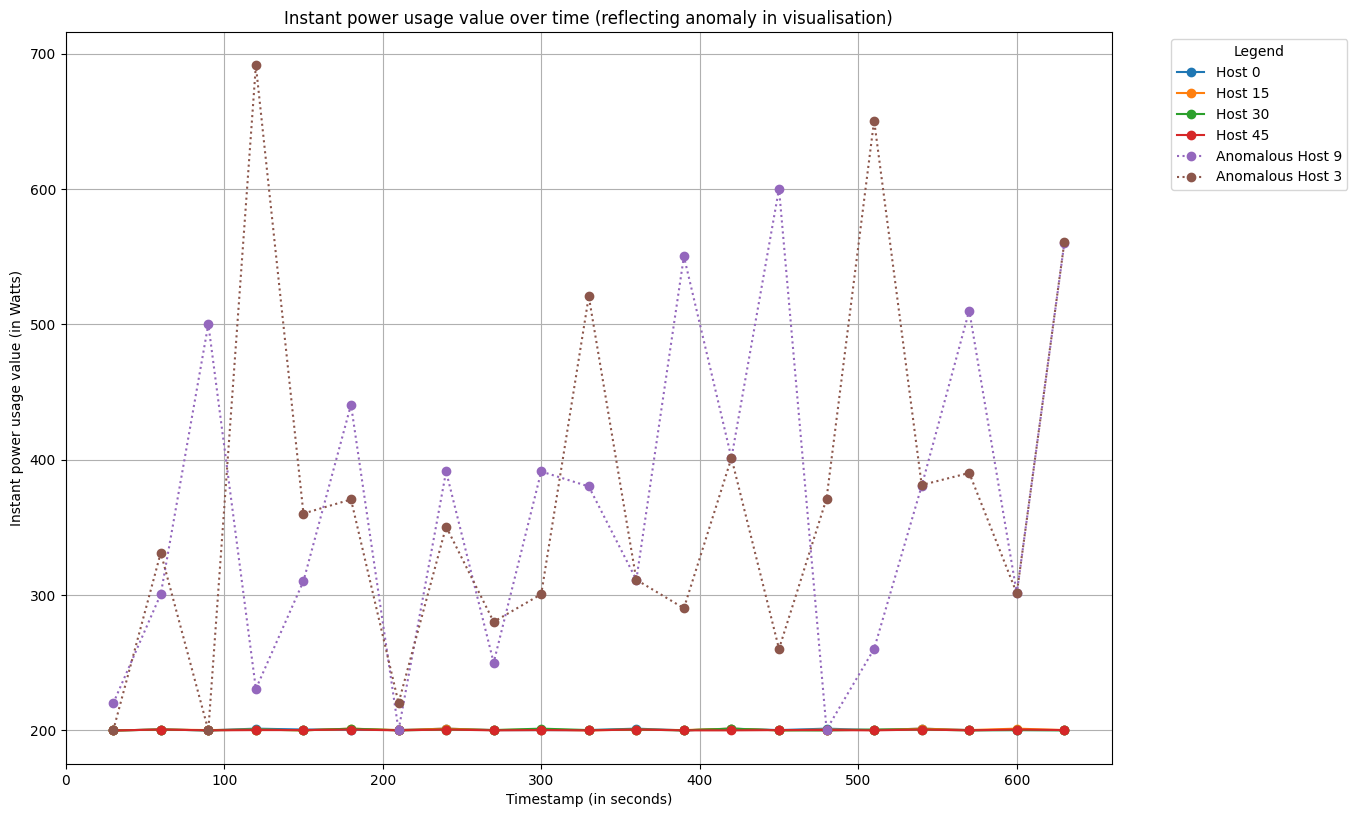

In [22]:
# Create a list of unique hosts
all_hosts = df_power_standard_anomaly['serverId'].unique()

# Increase the plot size
# plt.figure(figsize=(16, 10))

# Create the main plot with the left y-axis
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

# Plot all hosts from non-anomalous dataset
for host_id in all_hosts:
    if host_id in np.nditer(anomalous_servers, op_flags=['readwrite']):
        continue
    if (host_id % 15) != 0:
        continue
    host_data = df_power_standard_anomaly[df_power_standard_anomaly['serverId'] == host_id]
    ax1.plot(host_data['timestamp'], host_data['powerUsage'], marker='o', label=f'Host {host_id}')
    ax1.set_ylabel('Instant power usage value (in Watts)') #  color='b'
    # ax2.plot(host_data['timestamp'], host_data['guestsRunning'], marker='o', label=f'Host {host_id}')
    # ax2.set_ylabel('Number of Guests running')
    
for host_id in np.nditer(anomalous_servers, op_flags=['readwrite']):
    host_data = df_power_standard_anomaly[df_power_standard_anomaly['serverId'] == host_id]
    ax1.plot(host_data['timestamp'], host_data['powerUsage'], marker='o', label=f'Anomalous Host {host_id}', linestyle='dotted')
    # ax2.plot(host_data['timestamp'], host_data['guestsRunning'], marker='o', label=f'Anomalous Host {host_id}', linestyle='dotted')
    
# Combine the legend for both plots
lines, labels = ax1.get_legend_handles_labels()
# lines, labels = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
ax1.legend(lines, labels, loc='upper left')

# Adjust the legend placement outside of the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), title='Legend')

ax1.set_xlabel('Timestamp (in seconds)')
#ax1.set_ylabel('Instantaneous power usage value')
plt.title('Instant power usage value over time (reflecting anomaly in visualisation)')
# plt.legend()
plt.grid(True)
fig.set_size_inches(13.5, 9.5)
fig.savefig('multiple_hosts_anomaly_plotted_trace_shell_150.png', bbox_inches='tight')
plt.show()